In [41]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(16,12)})
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd  
import folium
import branca
import branca.colormap as cm

In [2]:
# Load full Data
df_full = pd.read_csv('data/processed/SimpleNNData.csv', index_col=0)
weather_var = list(df_full.columns[-22:-1])
df_full

,time_to_reservation,park_fuel,degree,weekend,hour_index,eng_118I,eng_COOPER,eng_I3,eng_X1,lz_102111,...,Avg_mean_relative_hum,Avg_mean_cloud_cover,Avg_Index_mean_temp,Avg_Index_mean_wind_speed,Avg_Index_acc_precip,Avg_Index_bright_sunshine,Avg_Index_mean_pressure,Avg_Index_mean_relative_hum,Avg_Index_mean_cloud_cover,dist_to_station
0,7.722778,43,12.529378,0,6.805269,0,0,1,0,0,...,73.877778,79.444444,14.775000,1.487500,0.0,0.0,1013.050000,74.612500,85.125000,386.856080
1,6.774445,86,14.027280,0,6.805269,0,0,1,0,0,...,74.612500,85.125000,14.775000,1.487500,0.0,0.0,1013.050000,74.612500,85.125000,1096.295483
2,6.522222,5,17.751882,0,6.805269,1,0,0,0,0,...,74.612500,85.125000,14.775000,1.487500,0.0,0.0,1013.050000,74.612500,85.125000,812.660741
3,5.100833,30,1.806991,0,6.805269,0,0,1,0,0,...,74.866667,81.166667,14.775000,1.487500,0.0,0.0,1013.050000,74.612500,85.125000,897.592806
4,6.211945,32,13.214864,0,6.805269,0,1,0,0,0,...,75.128571,83.571429,14.775000,1.487500,0.0,0.0,1013.050000,74.612500,85.125000,599.103807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326587,6.307500,94,20.556195,0,6.457874,0,0,1,0,0,...,96.385714,41.857143,4.214286,2.071429,0.0,0.0,1019.414286,96.385714,41.857143,275.431500
326588,7.528611,57,14.221806,0,6.457874,1,0,0,0,0,...,96.155556,38.222222,4.214286,2.071429,0.0,0.0,1019.414286,96.385714,41.857143,546.398658
326589,7.865556,48,16.451925,0,6.457874,1,0,0,0,0,...,96.155556,38.222222,4.214286,2.071429,0.0,0.0,1019.414286,96.385714,41.857143,615.556913
326590,5.028056,23,15.140361,0,6.457874,0,0,1,0,0,...,96.183333,33.833333,4.214286,2.071429,0.0,0.0,1019.414286,96.385714,41.857143,495.570805


## Time to Reservation

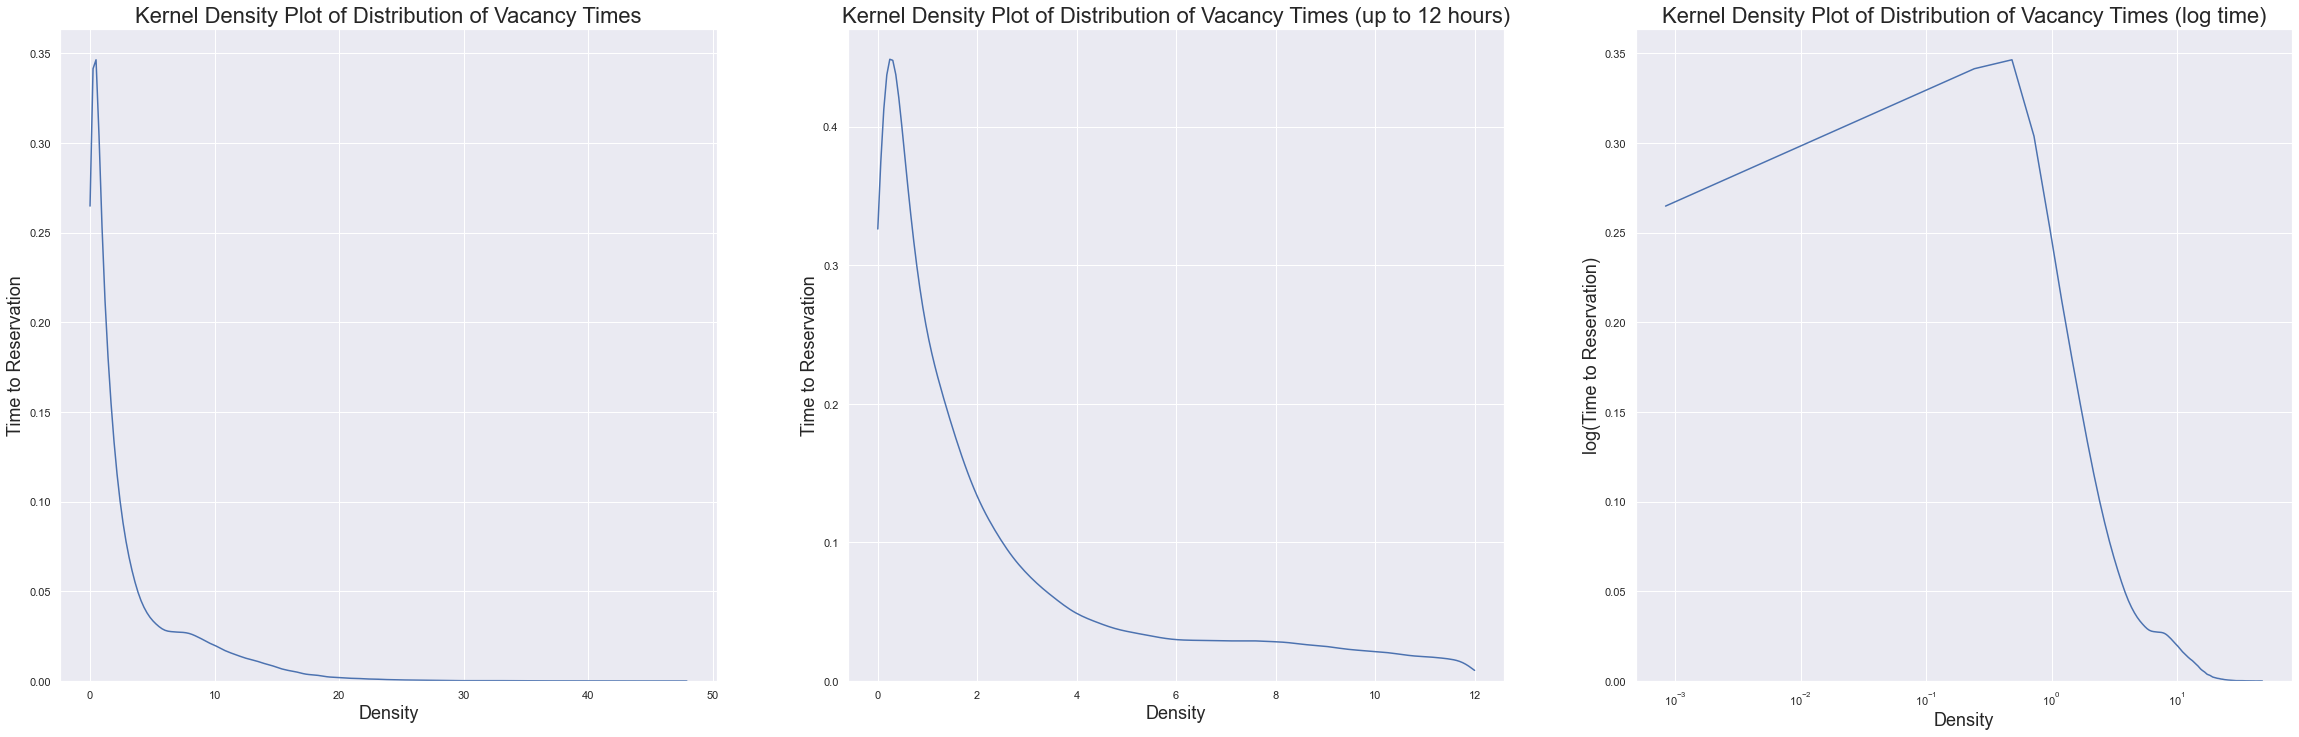

In [11]:
fig, axes = plt.subplots(1, 3,figsize=(40,12))
sns.kdeplot(data=df_full, x="time_to_reservation", cut = 0, ax=axes[0])
axes[0].axes.set_title("Kernel Density Plot of Distribution of Vacancy Times",fontsize=22)
axes[0].set_xlabel('Density',fontsize=18)
axes[0].set_ylabel("Time to Reservation",fontsize=18)
sns.kdeplot(data=df_full[df_full.time_to_reservation <= 12], x="time_to_reservation", cut = 0, ax=axes[1])
axes[1].axes.set_title("Kernel Density Plot of Distribution of Vacancy Times (up to 12 hours)",fontsize=22)
axes[1].set_xlabel('Density',fontsize=18)
axes[1].set_ylabel("Time to Reservation",fontsize=18)
sns.kdeplot(data=df_full, x="time_to_reservation", cut = 0 ,ax=axes[2])
axes[2].set(xscale = 'log')
axes[2].axes.set_title("Kernel Density Plot of Distribution of Vacancy Times (log time)",fontsize=22)
axes[2].set_xlabel('Density',fontsize=18)
axes[2].set_ylabel("log(Time to Reservation)",fontsize=18)
plt.show()

In [10]:
df_full.time_to_reservation.quantile([0, 0.05, .25, .5, .75, 0.95,1])

0.00     0.000833
0.05     0.051667
0.25     0.450278
0.50     1.446806
0.75     4.379722
0.95    12.983889
1.00    47.911945
Name: time_to_reservation, dtype: float64

## Hour (traffic index)

In [5]:
tdf = pd.read_csv('data/processed/Vacancy_new.csv', parse_dates=[2,3], index_col=0)
tdf['weekend'] = tdf.park_time.dt.weekday//5
tdf['park_time'] = tdf.park_time.round('h').dt.hour
tdf['weekend'] = tdf[tdf.time_to_reservation<=20]['weekend'].replace({0: 'Weekday', 1: 'Weekend'})

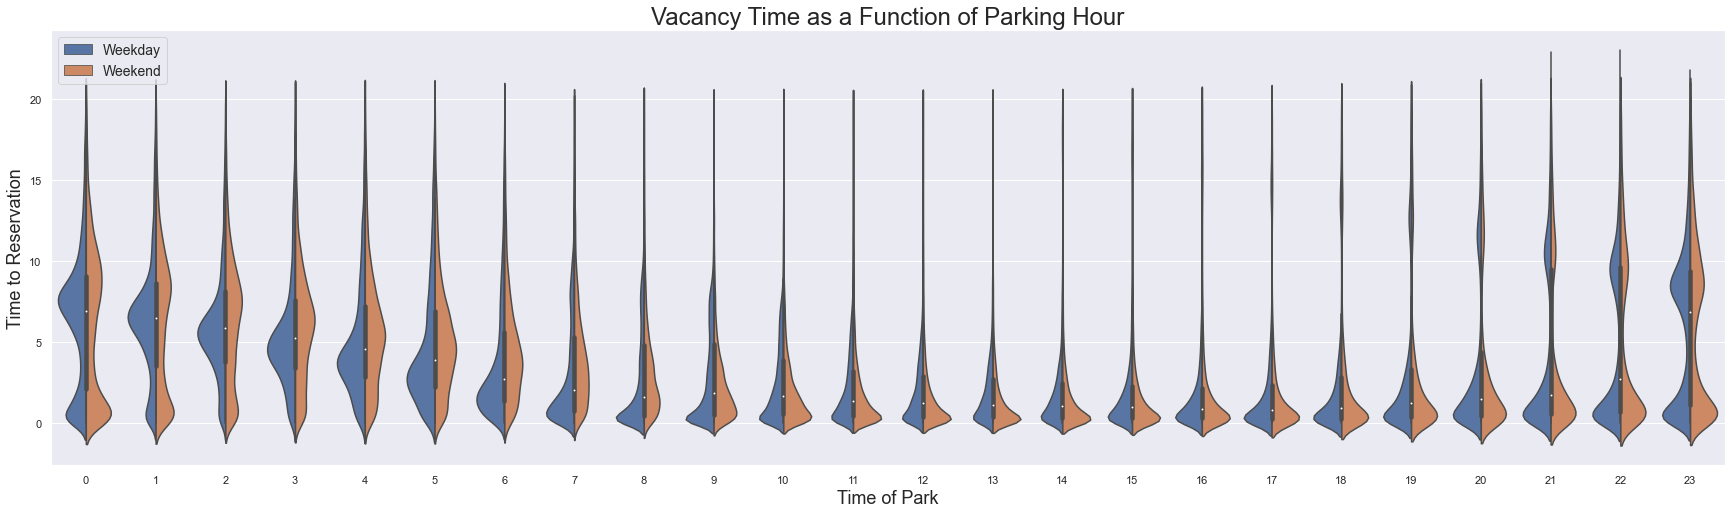

In [6]:
f = plt.figure(figsize=(30,8))
ax = sns.violinplot(x = 'park_time', y = 'time_to_reservation',  hue = 'weekend',  split=True, data = tdf)
ax.axes.set_title("Vacancy Time as a Function of Parking Hour",fontsize=24)
ax.set_xlabel('Time of Park',fontsize=18)
ax.set_ylabel("Time to Reservation",fontsize=18)
ax.legend(fontsize=14)
plt.show()

## Fuel

In [12]:
# Lower leads to faster pick-up time. Maybe the effect of rewarding "fueling" works
df_full[['time_to_reservation', 'park_fuel']].corr()

,time_to_reservation,park_fuel
time_to_reservation,1.000000,0.014989
park_fuel,0.014989,1.000000


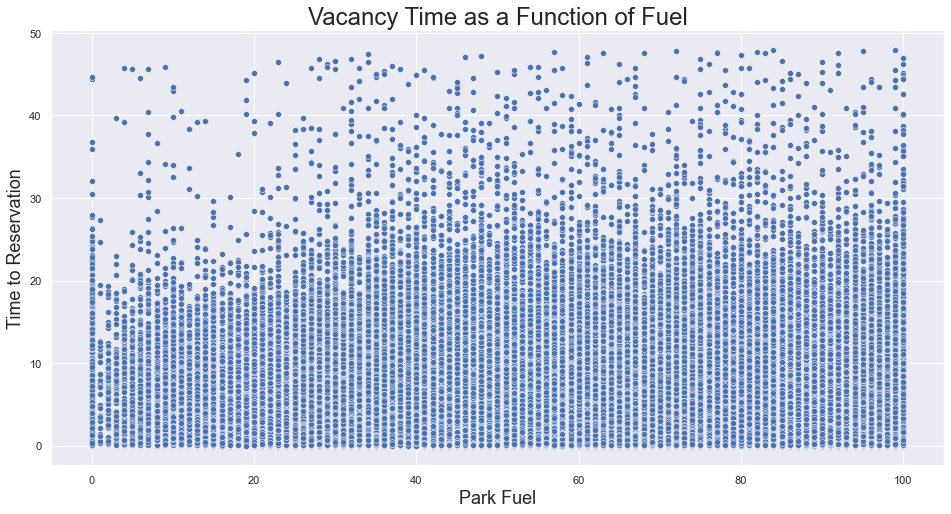

In [13]:
f = plt.figure(figsize=(16,8))
ax = sns.scatterplot(x = 'park_fuel', y ='time_to_reservation', data = df_full[df_full.park_fuel>=0])
ax.axes.set_title("Vacancy Time as a Function of Fuel",fontsize=24)
ax.set_xlabel('Park Fuel',fontsize=18)
ax.set_ylabel("Time to Reservation",fontsize=18)
plt.show()

## Engine + Weekend

In [14]:
Engine_Weekend_df = pd.concat([df_full.filter(regex = 'eng').idxmax(axis = 1),df_full[['time_to_reservation','weekend']]], axis = 1).rename(columns = {0:'Engine'})
Engine_Weekend_df['weekend'] = Engine_Weekend_df['weekend'].replace({0: 'Weekday', 1: 'Weekend'})

[(0.0, 12.0)]

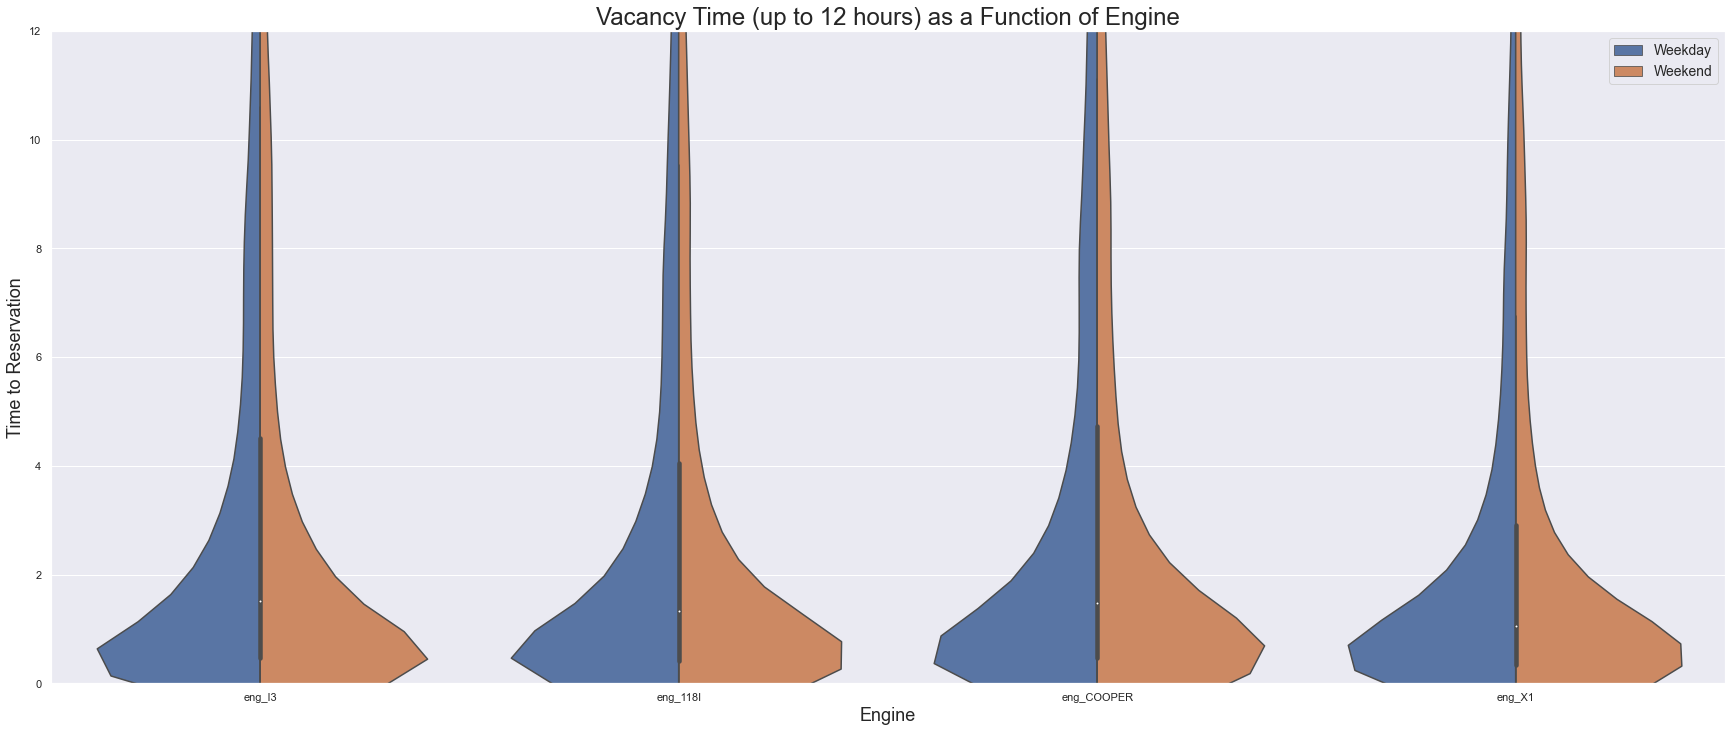

In [15]:
f = plt.figure(figsize=(30,12))
ax = sns.violinplot(x = 'Engine', y = 'time_to_reservation', hue = 'weekend',  split=True,data = Engine_Weekend_df)
ax.axes.set_title("Vacancy Time (up to 12 hours) as a Function of Engine",fontsize=24)
ax.set_xlabel('Engine',fontsize=18)
ax.set_ylabel("Time to Reservation",fontsize=18)
ax.legend(fontsize=14)
ax.set(ylim=(0,12))

In [16]:
Engine_Weekend_df.pivot_table(index = 'Engine', columns = 'weekend', values = 'time_to_reservation')
# Price differentation

weekend,Weekday,Weekend
Engine,,
eng_118I,3.321004,3.028229
eng_COOPER,3.667417,3.328963
eng_I3,3.488908,3.299735
eng_X1,2.558086,2.383819


## Degree

In [17]:
# More cars close 0.111294
df_full[['time_to_reservation', 'degree']].corr()

,time_to_reservation,degree
time_to_reservation,1.00000,0.11658
degree,0.11658,1.00000


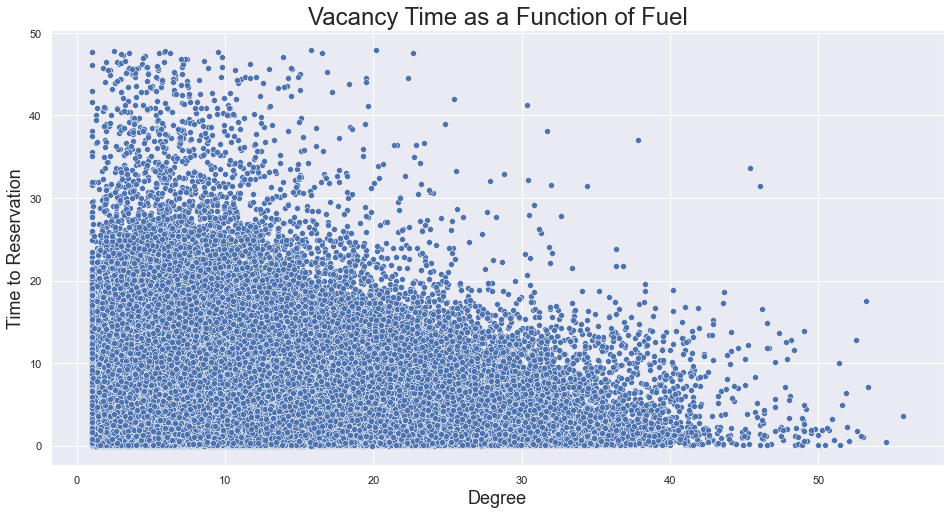

In [18]:
f = plt.figure(figsize=(16,8))
ax = sns.scatterplot(x = 'degree', y ='time_to_reservation', data = df_full)
ax.axes.set_title("Vacancy Time as a Function of Fuel",fontsize=24)
ax.set_xlabel('Degree',fontsize=18)
ax.set_ylabel("Time to Reservation",fontsize=18)
plt.show() # Very high degree must be in popular area why no extreme long time

## Zone

In [19]:
Zone_df = pd.concat([df_full.filter(regex = 'lz').idxmax(axis = 1),df_full[['time_to_reservation','degree']]], axis = 1).rename(columns = {0:'Zone'})

[]

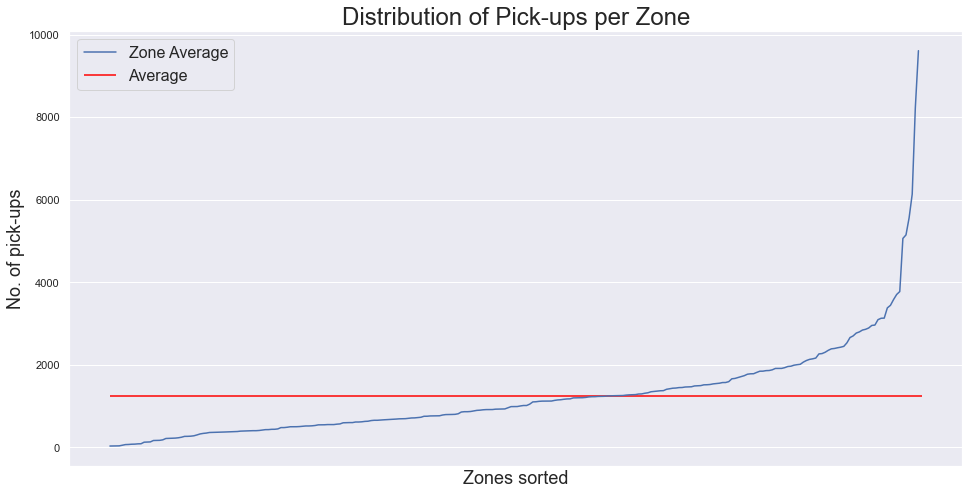

In [24]:
# Count per Zone
f = plt.figure(figsize=(16,8))
Zone_df.Zone.value_counts().sort_values(ascending = True).plot(label = 'Zone Average')
ax = plt.hlines(y = Zone_df.Zone.value_counts().sort_values(ascending = True).mean(),xmin = 0, xmax=Zone_df.Zone.nunique(), colors = 'red', label = 'Average')
ax.axes.set_title("Distribution of Pick-ups per Zone",fontsize=24)
ax.axes.set_xlabel('Zones sorted',fontsize=18)
ax.axes.set_ylabel("No. of pick-ups",fontsize=18)
ax.axes.set_xticks([])
plt.legend(fontsize = 16)
plt.plot()

In [158]:
Zone_time = Zone_df.groupby('Zone').mean().sort_values(by = 'time_to_reservation')
Zone_time['Count'] = Zone_time.index.map(dict(Zone_df.Zone.value_counts()))

,time_to_reservation,degree,Count
Zone,,,
lz_102184,0.921950,12.700080,1292
lz_102121,1.159903,13.710118,2351
lz_102151,1.164936,11.499416,1227
lz_102161,1.167401,13.019858,910
lz_102122,1.263664,14.142530,1047
...,...,...,...
lz_155017,9.396325,2.449789,340
lz_102322,10.517806,8.182583,90
lz_159053,12.279907,2.765415,36


In [26]:
# Zone + degree
ZoneID_dict = dict(iter(Zone_df.groupby('Zone')))
Deg_corr_Zone = pd.Series({Zone: sub_df[['time_to_reservation','degree']].corr().iloc[0,1] for Zone, sub_df in ZoneID_dict.items()})

[]

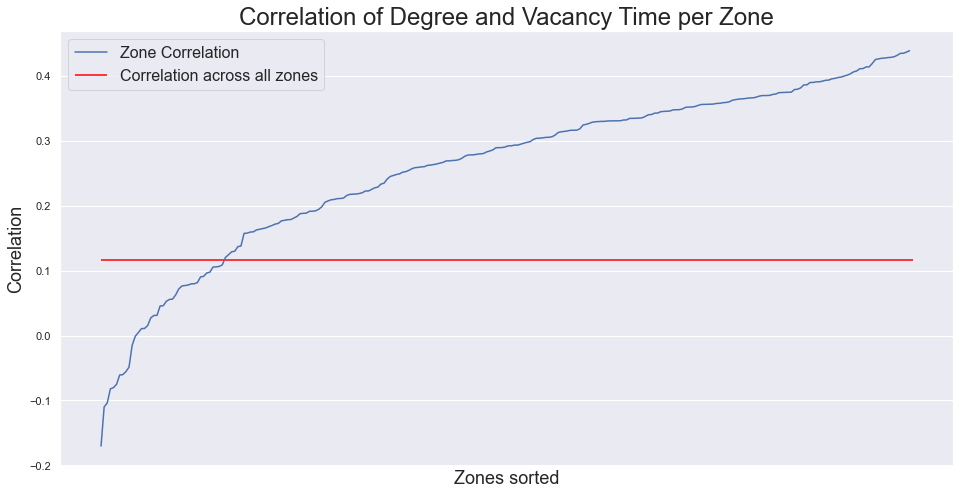

In [28]:
f = plt.figure(figsize=(16,8))
Deg_corr_Zone.sort_values().plot(label = 'Zone Correlation')
ax = plt.hlines(y=df_full[['time_to_reservation', 'degree']].corr().iloc[0,1],xmin = 0, xmax=len(Deg_corr_Zone), colors = 'red', label = 'Correlation across all zones')
ax.axes.set_title("Correlation of Degree and Vacancy Time per Zone",fontsize=24)
ax.axes.set_xlabel('Zones sorted',fontsize=18)
ax.axes.set_ylabel("Correlation",fontsize=18)
ax.axes.set_xticks([])
plt.legend(fontsize = 16)
plt.plot()

In [33]:
# Number of zones with stronger correlation
np.sum(Deg_corr_Zone > df_full[['time_to_reservation', 'degree']].corr().iloc[0,1])

221

[]

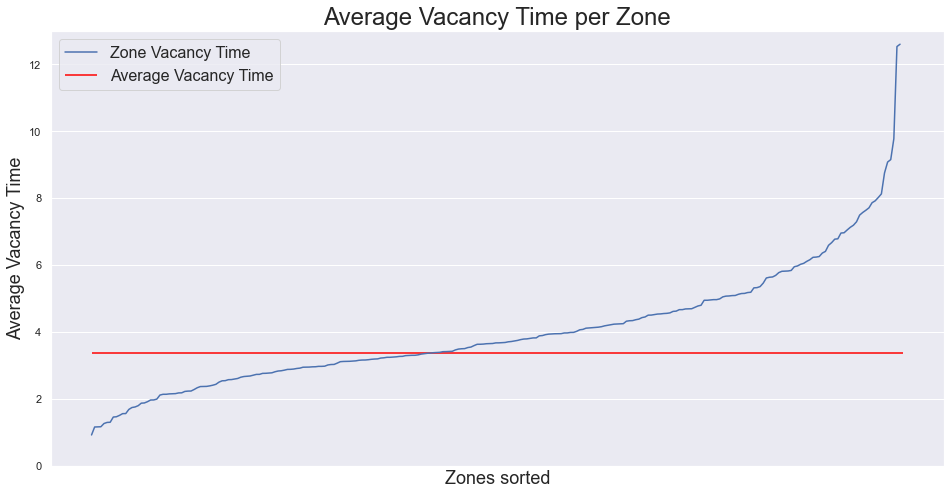

In [38]:
Zone_average = pd.Series({Zone: sub_df.time_to_reservation.mean() for Zone, sub_df in ZoneID_dict.items()}).sort_values()
f = plt.figure(figsize=(16,8))
ax = Zone_average.plot(label = 'Zone Vacancy Time')
ax = plt.hlines(y=df_full.time_to_reservation.mean(),xmin = 0, xmax=len(Deg_corr_Zone), colors = 'red', label = 'Average Vacancy Time')
ax.axes.set_title("Average Vacancy Time per Zone",fontsize=24)
ax.axes.set_xlabel('Zones sorted',fontsize=18)
ax.axes.set_ylabel("Average Vacancy Time",fontsize=18)
ax.axes.set_xticks([])
ax.axes.set_ylim(0,13)
plt.legend(fontsize = 16)
plt.plot()

In [39]:
avg_dict = {int(z[3:]): avg for z,avg in dict(Zone_average).items()}

gdf = gpd.read_file("../Zonekort/LTM_Zone3/zones_level3.shp").to_crs(epsg=4326)
gdf['Avg_Zone'] = gdf.zoneid.map(avg_dict)
gdf = gdf[~gdf.Avg_Zone.isna()]
gdf

,OBJECTID,komnr,zoneid,zonenavn,zonedescri,numadresse,Shape_Leng,Shape_Area,geometry,Avg_Zone
367,7464,147,147131,Frederiksberg Øst S Ø,Frederiksberg Kommune,296,2146.936913,2.272174e+05,"POLYGON ((12.54521 55.67558, 12.54716 55.67512...",2.137663
427,6581,101,102122,Amagertorv,"Københavns Kommune, indre by og Christianshavn",506,1651.615236,1.596530e+05,"POLYGON ((12.57804 55.68069, 12.57817 55.68060...",1.263664
428,6582,101,102325,Svanemøllen V,Københavns Kommune Nord,326,1835.852414,2.050950e+05,"POLYGON ((12.57741 55.70910, 12.57735 55.70909...",3.413525
483,6660,101,102222,Amalienborg Ø,"Københavns Kommune, indre by og Christianshavn",577,11296.760990,4.286966e+05,"MULTIPOLYGON (((12.58925 55.68615, 12.59628 55...",1.685292
484,6661,101,102863,Kgs Enghave N,Københavns Kommune syd for Frederiksberg,457,3688.931740,5.227625e+05,"POLYGON ((12.53414 55.64901, 12.53370 55.64868...",2.946895
...,...,...,...,...,...,...,...,...,...,...
3664,11339,101,102454,Ydre Nørrebro VSV,Københavns Kommune Nord,186,1718.362472,1.809837e+05,"POLYGON ((12.54180 55.69329, 12.54090 55.69239...",3.715492
3665,11340,101,102852,Sydhavn V,Københavns Kommune syd for Frederiksberg,274,2537.945040,2.286231e+05,"POLYGON ((12.53904 55.65353, 12.53943 55.65236...",3.257527
3666,11379,157,157262,Jægersborg-Vangede Midt,Gentofte Kommune,142,2176.893379,2.351585e+05,"POLYGON ((12.51968 55.75631, 12.52216 55.75375...",2.409282
3667,11400,169,169042,Høje Taastrup Station S,Høje Taastrup Kommune,172,4554.836303,1.127119e+06,"POLYGON ((12.28177 55.64188, 12.28176 55.64185...",7.050647


In [42]:
# Colormap
#cmap = matplotlib.cm.get_cmap('viridis')
cmap = cm.LinearColormap(colors=['green','yellow','red'], index=[min(gdf['Avg_Zone']),5,max(gdf['Avg_Zone'])],vmin=min(gdf['Avg_Zone']),vmax=max(gdf['Avg_Zone']), caption = 'Average Vacancy Time')

# Map
m = folium.Map(location=[55.68, 12.568337], zoom_start=12, prefer_canvas=True, width=2000,height=1200)

for i,(_, r) in enumerate(gdf[~gdf.Avg_Zone.isna()].iterrows()):
    sim_geo = gpd.GeoDataFrame(r[['geometry','Avg_Zone']]).T
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'color': matplotlib.colors.rgb2hex(cmap(x['properties']['Avg_Zone'])), 'fillOpacity': 0.6})

    geo_j.add_to(m)

m.add_child(cmap)
folium.map.LayerControl('topleft', collapsed=True).add_to(m)
m

## Stations

In [43]:
df_full[['time_to_reservation', 'dist_to_station']].corr() #Look into zone split 

,time_to_reservation,dist_to_station
time_to_reservation,1.000000,0.115583
dist_to_station,0.115583,1.000000


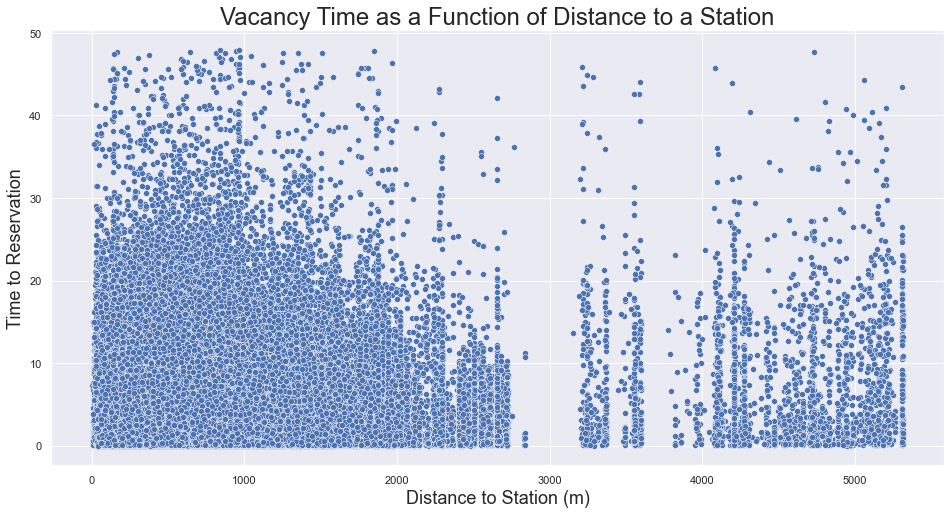

In [45]:
f = plt.figure(figsize=(16,8))
ax = sns.scatterplot(x = 'dist_to_station', y ='time_to_reservation', data = df_full)
ax.axes.set_title("Vacancy Time as a Function of Distance to a Station",fontsize=24)
ax.set_xlabel('Distance to Station (m)',fontsize=18)
ax.set_ylabel("Time to Reservation",fontsize=18)
plt.show()

In [52]:
# Zone + dist
Zone_df = pd.concat([df_full.filter(regex = 'lz').idxmax(axis = 1),df_full[['time_to_reservation','dist_to_station']]], axis = 1).rename(columns = {0:'Zone'})
ZoneID_dict = dict(iter(Zone_df.groupby('Zone')))
Dist_corr_Zone = pd.Series({Zone: sub_df[['time_to_reservation','dist_to_station']].corr().iloc[0,1] for Zone, sub_df in ZoneID_dict.items()})

[]

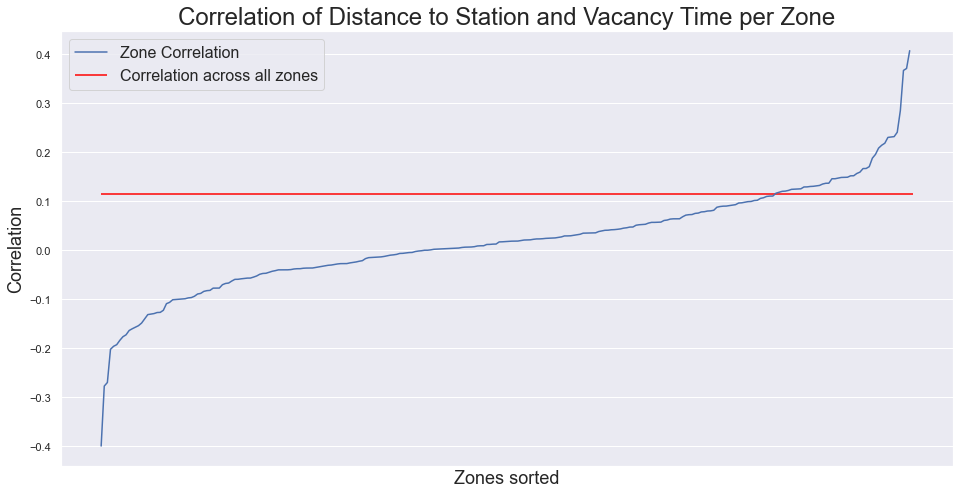

In [53]:
f = plt.figure(figsize=(16,8))
Dist_corr_Zone.sort_values().plot(label = 'Zone Correlation')
ax = plt.hlines(y=df_full[['time_to_reservation', 'dist_to_station']].corr().iloc[0,1],xmin = 0, xmax=len(Deg_corr_Zone), colors = 'red', label = 'Correlation across all zones')
ax.axes.set_title("Correlation of Distance to Station and Vacancy Time per Zone",fontsize=24)
ax.axes.set_xlabel('Zones sorted',fontsize=18)
ax.axes.set_ylabel("Correlation",fontsize=18)
ax.axes.set_xticks([])
plt.legend(fontsize = 16)
plt.plot()

## Weather

Correlation matrices

In [87]:
df_sub = df_full[df_full.time_to_reservation<=24]

In [103]:
df_full[['time_to_reservation']+weather_var[:7]].corr()

,time_to_reservation,mean_temp,mean_wind_speed,acc_precip,bright_sunshine,mean_pressure,mean_relative_hum,mean_cloud_cover
time_to_reservation,1.000000,-0.044307,-0.068198,-0.012008,-0.096155,0.016595,0.066291,-0.002619
mean_temp,-0.044307,1.000000,-0.043385,0.022393,0.396614,0.313042,-0.456779,-0.228585
mean_wind_speed,-0.068198,-0.043385,1.000000,0.064525,0.004018,-0.289847,-0.144457,0.189008
acc_precip,-0.012008,0.022393,0.064525,1.000000,-0.119413,-0.156752,0.209328,0.199918
bright_sunshine,-0.096155,0.396614,0.004018,-0.119413,1.000000,0.338694,-0.560049,-0.567037
mean_pressure,0.016595,0.313042,-0.289847,-0.156752,0.338694,1.000000,-0.402337,-0.414902
mean_relative_hum,0.066291,-0.456779,-0.144457,0.209328,-0.560049,-0.402337,1.000000,0.474065
mean_cloud_cover,-0.002619,-0.228585,0.189008,0.199918,-0.567037,-0.414902,0.474065,1.000000


In [104]:
df_full[['time_to_reservation']+weather_var[7:14]].corr() # spearman correlation

,time_to_reservation,Avg_mean_temp,Avg_mean_wind_speed,Avg_acc_precip,Avg_bright_sunshine,Avg_mean_pressure,Avg_mean_relative_hum,Avg_mean_cloud_cover
time_to_reservation,1.000000,-0.073190,-0.080185,-0.040902,-0.104706,0.015720,0.124960,-0.008494
Avg_mean_temp,-0.073190,1.000000,-0.052879,0.028264,0.418671,0.314084,-0.448196,-0.242080
Avg_mean_wind_speed,-0.080185,-0.052879,1.000000,0.071549,-0.002308,-0.293979,-0.145562,0.203093
Avg_acc_precip,-0.040902,0.028264,0.071549,1.000000,-0.131791,-0.177174,0.224406,0.219144
Avg_bright_sunshine,-0.104706,0.418671,-0.002308,-0.131791,1.000000,0.361810,-0.609842,-0.606868
Avg_mean_pressure,0.015720,0.314084,-0.293979,-0.177174,0.361810,1.000000,-0.405638,-0.439304
Avg_mean_relative_hum,0.124960,-0.448196,-0.145562,0.224406,-0.609842,-0.405638,1.000000,0.499003
Avg_mean_cloud_cover,-0.008494,-0.242080,0.203093,0.219144,-0.606868,-0.439304,0.499003,1.000000


In [105]:
df_full[['time_to_reservation']+weather_var[14:]].corr()

,time_to_reservation,Avg_Index_mean_temp,Avg_Index_mean_wind_speed,Avg_Index_acc_precip,Avg_Index_bright_sunshine,Avg_Index_mean_pressure,Avg_Index_mean_relative_hum,Avg_Index_mean_cloud_cover
time_to_reservation,1.000000,-0.053420,-0.065922,-0.030781,-0.092168,0.015441,0.088899,-0.007299
Avg_Index_mean_temp,-0.053420,1.000000,-0.063138,0.034842,0.416007,0.312368,-0.437892,-0.246291
Avg_Index_mean_wind_speed,-0.065922,-0.063138,1.000000,0.097639,0.005943,-0.297636,-0.131389,0.212879
Avg_Index_acc_precip,-0.030781,0.034842,0.097639,1.000000,-0.144779,-0.207385,0.249977,0.248188
Avg_Index_bright_sunshine,-0.092168,0.416007,0.005943,-0.144779,1.000000,0.363911,-0.629916,-0.602751
Avg_Index_mean_pressure,0.015441,0.312368,-0.297636,-0.207385,0.363911,1.000000,-0.413197,-0.447972
Avg_Index_mean_relative_hum,0.088899,-0.437892,-0.131389,0.249977,-0.629916,-0.413197,1.000000,0.517382
Avg_Index_mean_cloud_cover,-0.007299,-0.246291,0.212879,0.248188,-0.602751,-0.447972,0.517382,1.000000


In [155]:
df_full[['time_to_reservation']+weather_var[7:14]]

,time_to_reservation,Avg_mean_temp,Avg_mean_wind_speed,Avg_acc_precip,Avg_bright_sunshine,Avg_mean_pressure,Avg_mean_relative_hum,Avg_mean_cloud_cover
0,7.722778,15.044444,1.688889,0.0,0.033333,1012.855556,73.877778,79.444444
1,6.774445,14.775000,1.487500,0.0,0.000000,1013.050000,74.612500,85.125000
2,6.522222,14.775000,1.487500,0.0,0.000000,1013.050000,74.612500,85.125000
3,5.100833,14.433333,1.333333,0.0,0.000000,1013.450000,74.866667,81.166667
4,6.211945,14.557143,1.357143,0.0,0.000000,1013.242857,75.128571,83.571429
...,...,...,...,...,...,...,...,...
326733,6.307500,4.214286,2.071429,0.0,0.000000,1019.414286,96.385714,41.857143
326734,7.528611,4.444444,2.355556,0.0,0.000000,1019.311111,96.155556,38.222222
326735,7.865556,4.444444,2.355556,0.0,0.000000,1019.311111,96.155556,38.222222
326736,5.028056,4.066667,1.916667,0.0,0.000000,1019.466667,96.183333,33.833333


,Avg_mean_temp,Avg_mean_wind_speed,Avg_acc_precip,Avg_bright_sunshine,Avg_mean_pressure,Avg_mean_relative_hum,Avg_mean_cloud_cover,dist_to_station
0,15.044444,1.688889,0.0,0.033333,1012.855556,73.877778,79.444444,386.856080
1,14.775000,1.487500,0.0,0.000000,1013.050000,74.612500,85.125000,1096.295483
2,14.775000,1.487500,0.0,0.000000,1013.050000,74.612500,85.125000,812.660741
3,14.433333,1.333333,0.0,0.000000,1013.450000,74.866667,81.166667,897.592806
4,14.557143,1.357143,0.0,0.000000,1013.242857,75.128571,83.571429,599.103807
...,...,...,...,...,...,...,...,...
326733,4.214286,2.071429,0.0,0.000000,1019.414286,96.385714,41.857143,275.431500
326734,4.444444,2.355556,0.0,0.000000,1019.311111,96.155556,38.222222,546.398658
326735,4.444444,2.355556,0.0,0.000000,1019.311111,96.155556,38.222222,615.556913
326736,4.066667,1.916667,0.0,0.000000,1019.466667,96.183333,33.833333,495.570805


In [98]:
regr = ElasticNetCV(l1_ratio = [.1, .5, .7, .9, .95, .99, 1], cv=5, random_state=0, verbose = 1)
regr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], random_state=0,
             verbose=1)

In [99]:
print(regr.alpha_, regr.l1_ratio_)

0.2449373382012502 1.0


In [100]:
r2_score(y_test,regr.predict(X_test))

0.05008718185458938

In [101]:
print(regr.intercept_)

-24.750720216906412


In [102]:
regr.coef_

array([-0.00081434, -0.        , -0.        , -0.0293653 ,  0.0243448 ,
        0.05095338, -0.0149853 ,  0.00075578])